#Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from statistics import mean

#Mounting Drive and Importing Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Character Dataset/A_Z Handwritten Data.csv")
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.drop('0',axis = 1) 
y = data['0']

#Reshaping Data for Image Conversion

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28))

In [7]:
print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of train data:  (297960, 28, 28)
Shape of test data:  (74490, 28, 28)


#Encoding Alphabets

In [8]:
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [9]:
y_int = np.int0(y)
count =[0]*26
for i in y_int:
    count[i] +=1 
alphabets = []
for i in encode.values():
    alphabets.append(i) 

#Displaying Characters and their Frequencies

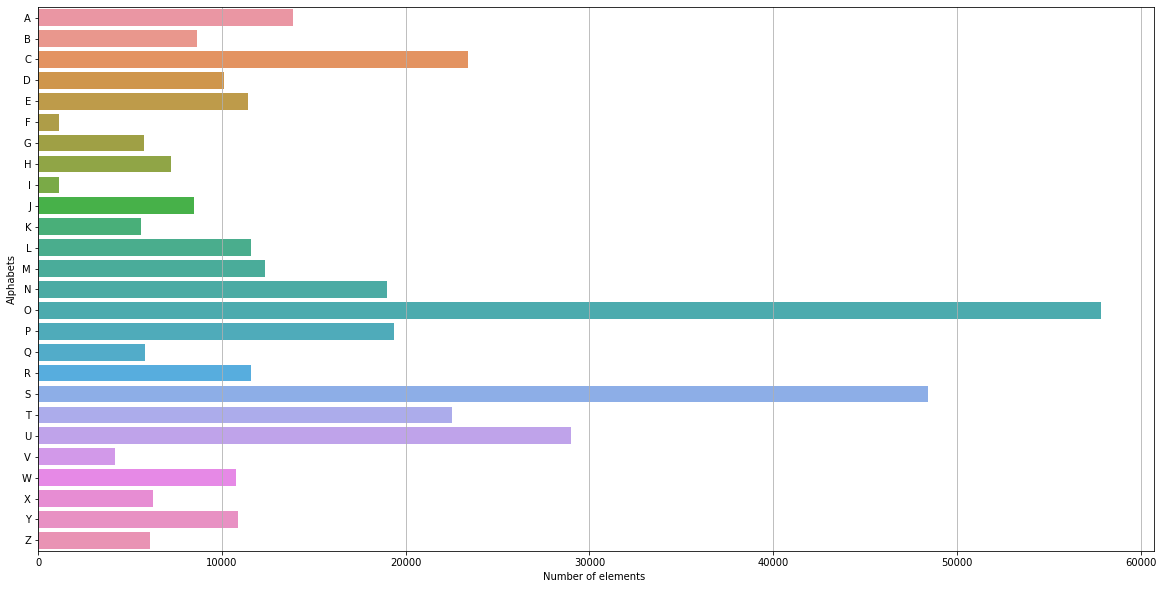

In [10]:
plt.figure(figsize=(20,10))
s=sns.barplot(x=count,y=alphabets)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid(axis='x')

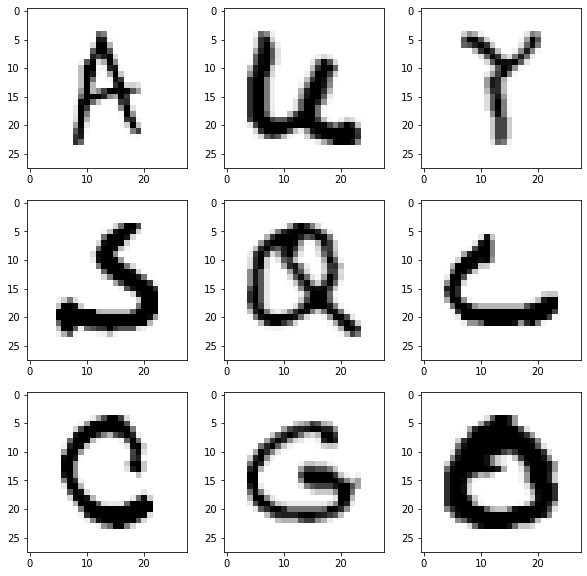

In [11]:
shuf = shuffle(X_train[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
  axes[i].imshow(np.reshape(shuf[i],(28,28)), cmap="Greys")
plt.show()

#Reshaping for Model fitting

In [12]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
X_train = tf.convert_to_tensor(X_train,dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test,dtype=tf.float32)
print("New shape of train data: ", X_train.shape)
print("New shape of test data: ", X_test.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


In [13]:
train_yOHE = to_categorical(Y_train, num_classes = 26, dtype='int')
test_yOHE = to_categorical(Y_test, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


#Convolution Neutral Network 

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

Compiling and Fitting

In [15]:
model.compile( loss='categorical_crossentropy', metrics=['accuracy'],optimizer='Adam')

In [16]:
history = model.fit(X_train, train_yOHE, epochs=10,  validation_data = (X_test,test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 471s 50ms/step - loss: 0.1560 - accuracy: 0.9574 - val_loss: 0.0711 - val_accuracy: 0.9793
Epoch 2/10
9312/9312 [==============================] - 462s 50ms/step - loss: 0.0725 - accuracy: 0.9801 - val_loss: 0.0720 - val_accuracy: 0.9799
Epoch 3/10
9312/9312 [==============================] - 461s 49ms/step - loss: 0.0626 - accuracy: 0.9829 - val_loss: 0.0764 - val_accuracy: 0.9809
Epoch 4/10
9312/9312 [==============================] - 457s 49ms/step - loss: 0.0574 - accuracy: 0.9845 - val_loss: 0.0625 - val_accuracy: 0.9846
Epoch 5/10
9312/9312 [==============================] - 454s 49ms/step - loss: 0.0542 - accuracy: 0.9856 - val_loss: 0.0646 - val_accuracy: 0.9839
Epoch 6/10
9312/9312 [==============================] - 458s 49ms/step - loss: 0.0530 - accuracy: 0.9864 - val_loss: 0.0761 - val_accuracy: 0.9821
Epoch 7/10
9312/9312 [==============================] - 455s 49ms/step - loss: 0.0509 - accuracy: 0.9871 - val_loss: 0

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [20]:
print("The avg validation accuracy (over 10 epochs) is :", mean(history.history['val_accuracy'])*100)
print("The avg training accuracy (over 10 epochs) is :", mean(history.history['accuracy'])*100)
print("The avg validation loss (over 10 epochs) is :", mean(history.history['val_loss'])*100)
print("The avg training loss (over 10 epochs) is :", mean(history.history['loss'])*100)

The avg validation accuracy (over 10 epochs) is : 98.31225633621216
The avg training accuracy (over 10 epochs) is : 98.26094090938568
The avg validation loss (over 10 epochs) is : 6.932668276131153
The avg training loss (over 10 epochs) is : 6.627719588577747


Predection on Test Data

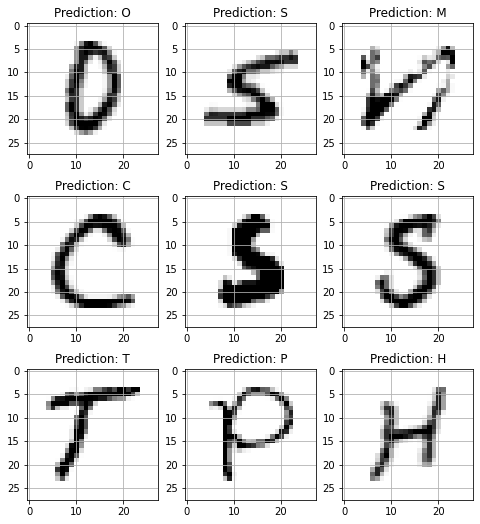

In [25]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = alphabets[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

#Uploaded Data Predection

Image Uploading

In [26]:
img = cv2.imread('/content/K.png')
img_copy = img.copy()
img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

Image Processing 

In [27]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

Reshaping for Fittng

In [28]:
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [29]:
img_pred = alphabets[np.argmax(model.predict(img_final))]

Displaying the Predection

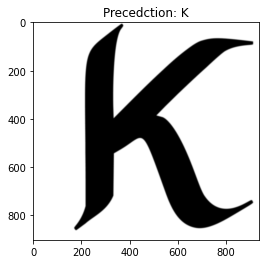

In [32]:
plt.imshow(img_gray,'gray')
plt.title('Precedction: '+img_pred)
plt.show()